# Observations and Insights 

## The sexes of the mouse are controlled well with a rounded 50-50 proportionality between male and female mouse
## Out of all the drugs, the average tumor volumn of Capomulin and Ramicane have the lowest standard deviations and lowest standard errors, suggesting the results of the two drugs are more consistent and reliable than other drugs
## After treatment, the average tumor volumn of mouse treated with Capomulin is close with the average tumor volumn of mouse treated with Ramicane, suggesting similar effectiveness of the two drugs.
## After treatment, the average tumor volumn of mouse treated with Ceftamin is close with the average tumor volumn of mouse treated with Infubinol, suggesting similar effectiveness of the two drugs
## There is a moderate correlation between mouse weight versus average tumor volume for the Capomulin treatment regimen
## When treated with Capomulin, the tumor volumn of Mouse ID s185 consistently decreases over different timepoints

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_result = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
combined_result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
combined_result = combined_result.loc[combined_result['Mouse ID'] != "?"]
len(combined_result["Mouse ID"].value_counts())

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_result[combined_result.duplicated(["Timepoint", "Mouse ID"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = combined_result.drop_duplicates(subset=["Timepoint", "Mouse ID"], keep='first')

In [24]:
# Checking the number of mice in the clean DataFrame.
len(df["Mouse ID"].value_counts())

249

## Summary Statistics

In [25]:
# Use a single groupby function 
grouped_df = df.groupby("Drug Regimen")

# Find mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug = df["Drug Regimen"].unique()
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var(ddof = 0)
std_deviation = grouped_df["Tumor Volume (mm3)"].std(ddof = 0)
sem = grouped_df["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of the findings
summary = pd.DataFrame({
    "Drug Regimen": drug, 
    "Mean": mean, 
    "Median": median, 
    "Variance": variance,
    "Standard Deviation": std_deviation,
    "Standard Error": sem})
del summary["Drug Regimen"]
summary

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.393463,50.909965,42.862273,6.546928,0.525862
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar and Pie Charts

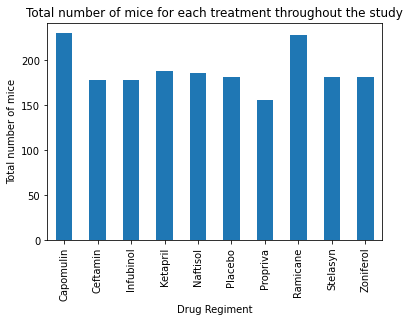

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_total = grouped_df["Mouse ID"].count()
mice_total.plot(kind="bar")
plt.title("Total number of mice for each treatment throughout the study")
plt.xlabel("Drug Regiment")
plt.ylabel("Total number of mice")
plt.show()

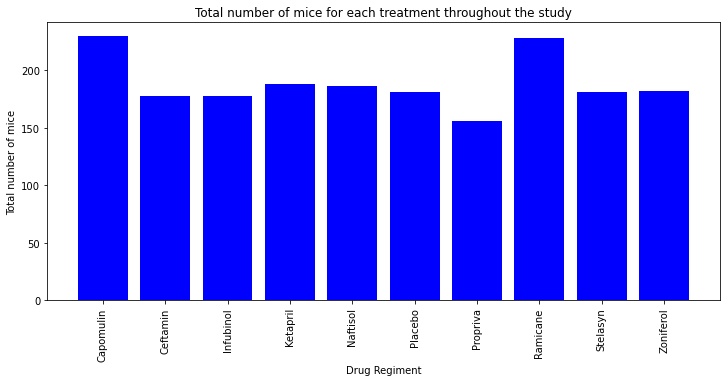

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = list(mice_total)
x_axis = np.arange(len(y_axis))
drug_name = list(drug)
drug_name.sort()

# Create bar chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color='blue', alpha=1)
plt.xticks(x_axis, drug_name, rotation="vertical")
plt.tight_layout()

# Set a Title and labels
plt.title("Total number of mice for each treatment throughout the study")
plt.xlabel("Drug Regiment")
plt.ylabel("Total number of mice")
plt.show()

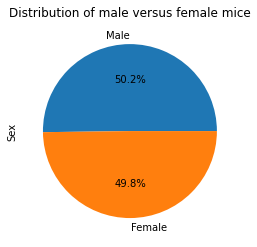

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice = df.drop_duplicates(subset=["Mouse ID"], keep='first')
unique_mice = unique_mice["Sex"].value_counts()
labels = ["Male", "Female"]
unique_mice.plot(kind="pie", y=labels, autopct="%1.1f%%", title=("Distribution of male versus female mice"))
plt.show()

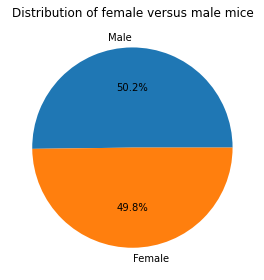

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
unique_mice = df.drop_duplicates(subset=["Mouse ID"], keep='first')
unique_mice = unique_mice["Sex"].value_counts()
values = list(unique_mice)
labels = ["Male", "Female"]
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of female versus male mice")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mouse = df.groupby("Mouse ID")
grouped_index = grouped_mouse["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe
new_df = pd.merge(grouped_index, df, how='left', on=["Mouse ID", "Timepoint"])
new_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumn = []

# Locate the rows which contain mice on each drug and get the tumor volumes
volumn = new_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset 
quartiles = new_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

# Determine outliers using upper and lower bounds
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumn is: {lowerq}")
print(f"The upper quartile of tumor volumn is: {upperq}")
print(f"The interquartile range of tumor volumn is: {iqr}")
print(f"The the median of tumor volumn is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volumn is: 45.93471217
The upper quartile of tumor volumn is: 64.95756185
The interquartile range of tumor volumn is: 19.022849680000007
The the median of tumor volumn is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


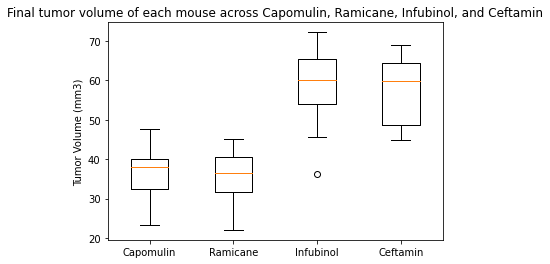

In [32]:
# Data for the final tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_loc = new_df.loc[new_df["Drug Regimen"] == "Capomulin", :]
capomulin_data = capomulin_loc["Tumor Volume (mm3)"]
ramicane_loc = new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
ramicane_data = ramicane_loc["Tumor Volume (mm3)"]
infubinol_loc = new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
infubinol_data = infubinol_loc["Tumor Volume (mm3)"]
ceftamin_loc = new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_data = ceftamin_loc["Tumor Volume (mm3)"]
plot_data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]

# Generate a box plot of the final tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(plot_data)
plt.show()

## Line and Scatter Plots

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse number s185 that was treated with Capomulin
capomulin_mice = combined_result.loc[combined_result["Mouse ID"] == "s185", :]
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


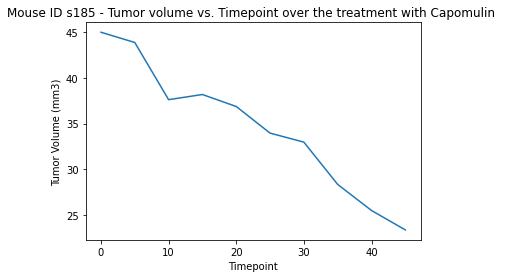

In [34]:
# Line plot of tumor volume vs. time point for mouse ID s185
x_axis = list(capomulin_mice["Timepoint"])
y_axis = list(capomulin_mice["Tumor Volume (mm3)"])
plt.plot(x_axis, y_axis)
plt.title("Mouse ID s185 - Tumor volume vs. Timepoint over the treatment with Capomulin ")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [35]:
# Calculate mouse weight versus average tumor volume for the Capomulin treatment regimen
# Set index to Drug Regimen to filter by drug
capomulin_df = df.set_index("Drug Regimen")
# Group by mouse id, find average weight and average tumor volume for each mouse
capomulin_df = capomulin_df.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean()

#Rename to reflect average data
capomulin_df = capomulin_df.rename(columns={"Weight (g)": "Average Weight (g)","Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomulin_df


C:\Users\annah\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Average Weight (g),Average Tumor Volume (mm3)
Mouse ID,,
a203,23,56.312708
a251,25,55.237095
a262,29,58.611631
a275,28,52.770965
a366,29,54.639906
...,...,...
z435,26,46.942214
z578,16,38.411510
z581,25,53.979584


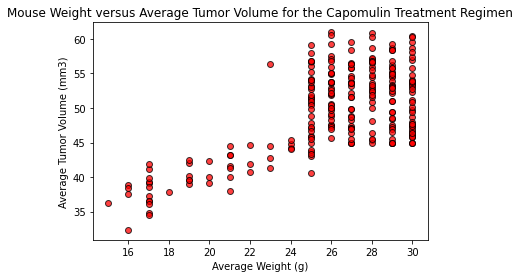

In [36]:
# Scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen
x_values = capomulin_df["Average Weight (g)"]
y_values = capomulin_df["Average Tumor Volume (mm3)"]
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Treatment Regimen")
plt.show()

## Correlation and Regression

In [37]:
# Correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df["Average Weight (g)"]
y_values = capomulin_df["Average Tumor Volume (mm3)"]
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.66


The linear regression model is y = 1.1x + 21.03
The r-squared is: 0.43413546745981846


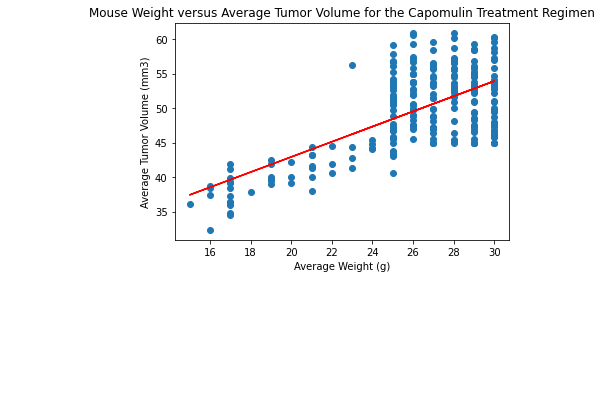

In [38]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df["Average Weight (g)"]
y_values = capomulin_df["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Treatment Regimen")
plt.show()